# JAMBOREE EDUCATION 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [12]:
df = pd.read_csv("E:/DSML_Projects/LinearRegression/Jamboree_Admission.csv")

In [13]:
df.shape


(500, 9)

In [14]:
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


* By seeing the data Serial No. column doesn't contain useful information so dropping this

In [15]:
df.drop(columns = "Serial No.",inplace=True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


* The data has 4 interger columns and 4 float columns

In [17]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


* As there are no missing values there is no need to sue any imputation methods

In [19]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

* Here "Chance of Admit" and "LOR" has space after name so renaming it

In [20]:
df.rename(columns= {"LOR ": "LOR","Chance of Admit ":"Chance of Admit"},inplace=True)

In [21]:
df["SOP"].nunique()

9

In [22]:
df["University Rating"].nunique()

5

In [23]:
df["LOR"].nunique()

9

In [24]:
df["Research"].nunique()

2

In [27]:
cols = df.columns
cols


Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

* As 9 is highest for all dsicrete columns I will keep 11 as limit for dividing into discrete and continuos columns

In [28]:
dcol = [] #discrete numerical column
ccol = [] #continuous numerical column
for i in cols:
    if df[i].nunique()<11:
        dcol.append(i)
    else:
        ccol.append(i)
print(dcol)
print(ccol)


['University Rating', 'SOP', 'LOR', 'Research']
['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']


In [29]:
#Checking value counts for each discrete column
for i in dcol:
    print(i)
    print(df[i].value_counts(normalize=True)*100,"\n")

University Rating
3    32.4
2    25.2
4    21.0
5    14.6
1     6.8
Name: University Rating, dtype: float64 

SOP
4.0    17.8
3.5    17.6
3.0    16.0
2.5    12.8
4.5    12.6
2.0     8.6
5.0     8.4
1.5     5.0
1.0     1.2
Name: SOP, dtype: float64 

LOR
3.0    19.8
4.0    18.8
3.5    17.2
4.5    12.6
5.0    10.0
2.5    10.0
2.0     9.2
1.5     2.2
1.0     0.2
Name: LOR, dtype: float64 

Research
1    56.0
0    44.0
Name: Research, dtype: float64 



In [31]:
#checking variation of all continuous columns with discrete columns
for i in dcol:
    for j in ccol:
        print(df.groupby(i).agg({j:['count', 'mean']}))
        print("\n")

                  GRE Score            
                      count        mean
University Rating                      
1                        34  304.911765
2                       126  309.134921
3                       162  315.030864
4                       105  323.304762
5                        73  327.890411


                  TOEFL Score            
                        count        mean
University Rating                        
1                          34  100.205882
2                         126  103.444444
3                         162  106.314815
4                         105  110.961905
5                          73  113.438356


                   CGPA          
                  count      mean
University Rating                
1                    34  7.798529
2                   126  8.177778
3                   162  8.500123
4                   105  8.936667
5                    73  9.278082


                  Chance of Admit          
                      

* As university rating increases CGPA, TOEFL,GRE scores need to be high
* Chance of getting Admissions increases for students who did Research

# VISUAL Analysis

# UNIVARIATE ANALYSIS

In [33]:
df[ccol].describe()

,GRE Score,TOEFL Score,CGPA,Chance of Admit
count,500.000000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,8.576440,0.72174
std,11.295148,6.081868,0.604813,0.14114
min,290.000000,92.000000,6.800000,0.34000
25%,308.000000,103.000000,8.127500,0.63000
50%,317.000000,107.000000,8.560000,0.72000
75%,325.000000,112.000000,9.040000,0.82000
max,340.000000,120.000000,9.920000,0.97000


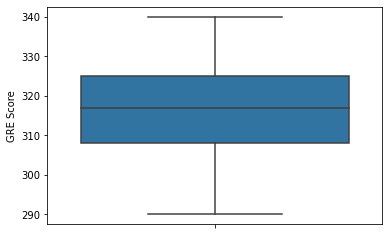

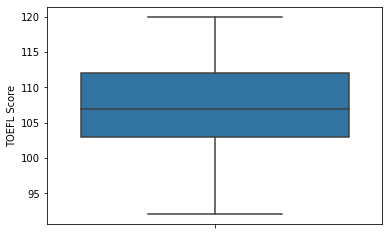

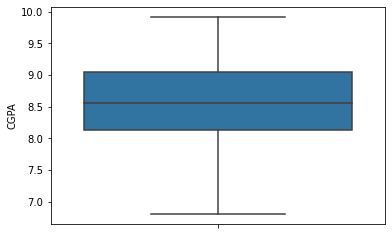

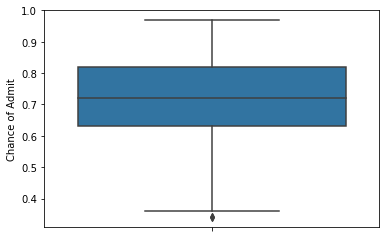

In [30]:
for i in ccol:
    sns.boxplot(data = df, y= i)
    plt.show()

* For GRE almost 75% of the data lies between 305-325
* For TOEFL almost 75% of the data lies between 102-112
* For CGPA almost 75% of data has 8.2-9.2 

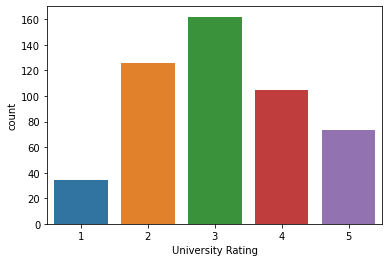

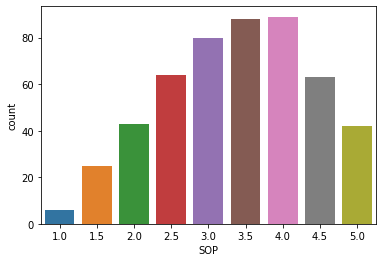

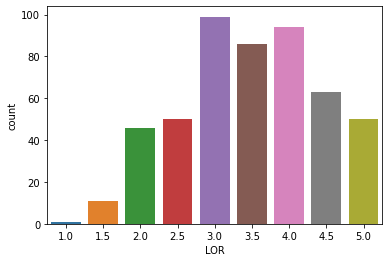

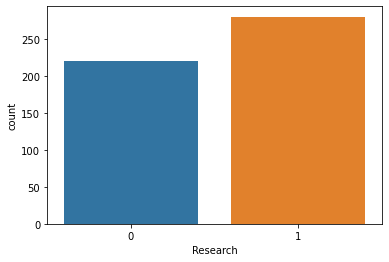

In [34]:
for i in dcol:
    sns.countplot(data = df,x = i)
    plt.show()

* There are more students who joined in Universities with 3 Rating
* More people has 3.0,3.5,4 SOP
* There are more people with LOR 3.0,4.0
* There are more people who has done Research

# Bivariate analysis

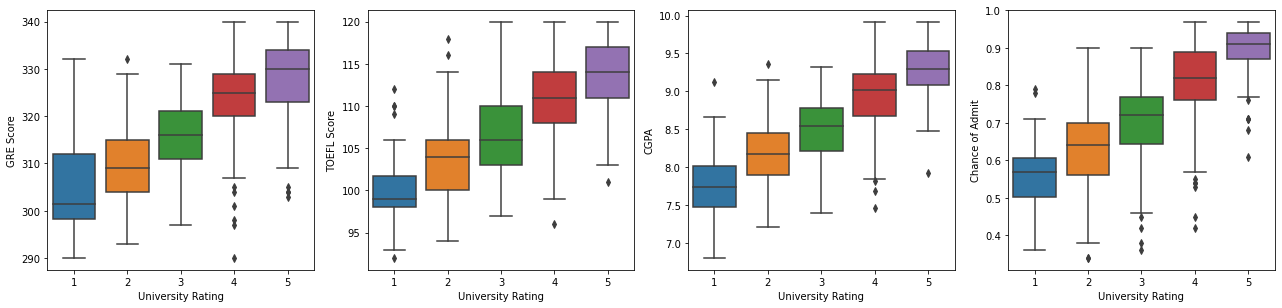

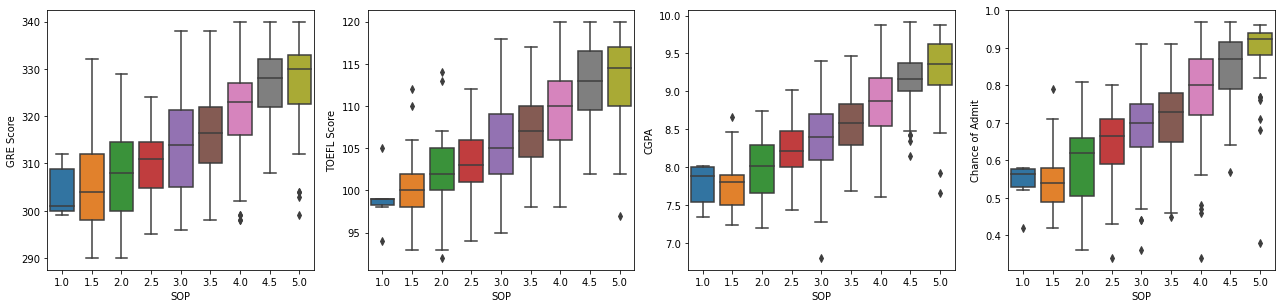

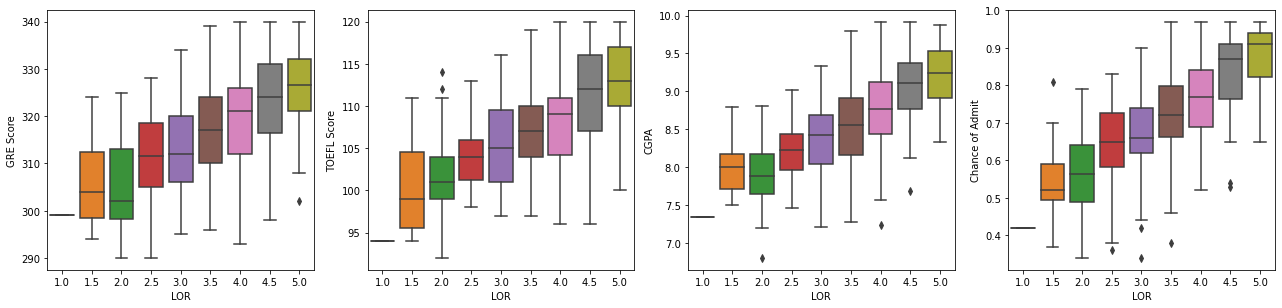

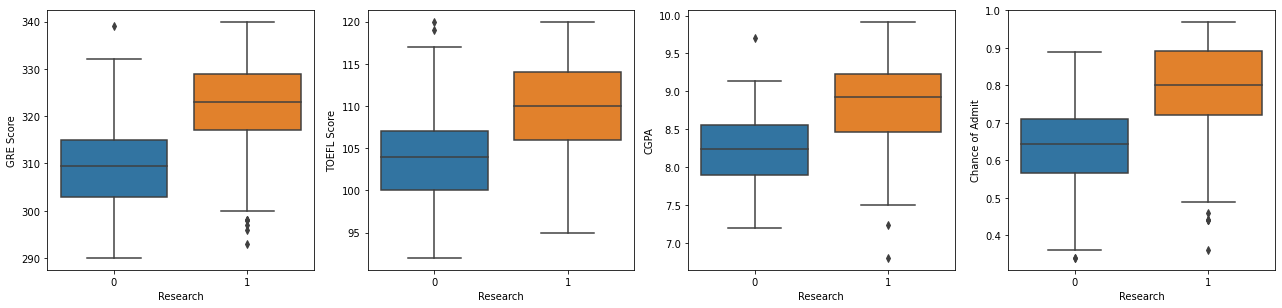

In [37]:
for i in dcol:
    d = 0
    fig = plt.subplots(figsize = (22,22))
    for j in ccol:
        plt.subplot(4,4,d+1)
        sns.boxplot(data = df,x = i,y=j)
        d+=1
    plt.show()

* As there is increase in continuous variables there is increase in discrete variables

<Figure size 432x288 with 0 Axes>

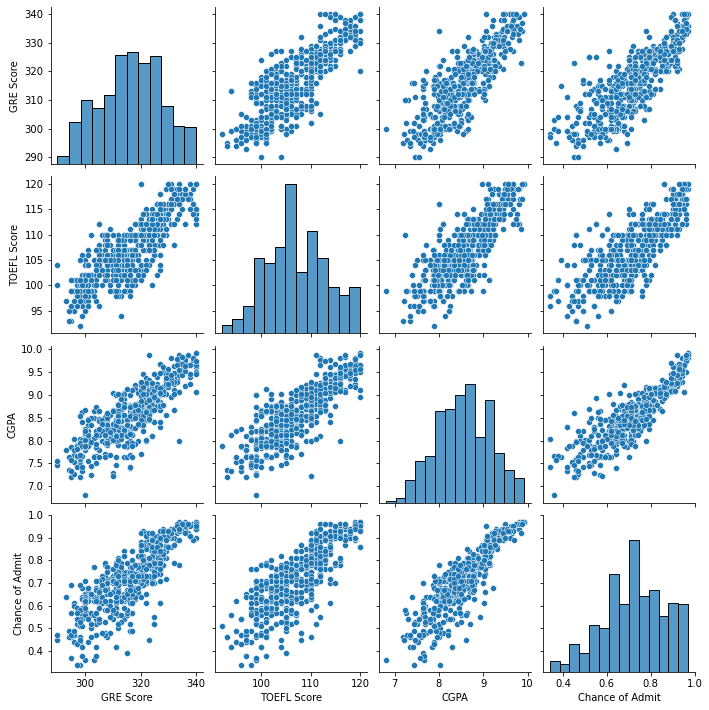

In [40]:
plt.figure()
sns.pairplot(df, vars=['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit'], markers=["o", "s"])
plt.show()

* I can see there is linear relationship between our target and remaining cols
* The spread of data-points ,when plotted against the target variable, is not forming a funnel, indicative of homoskadasticity


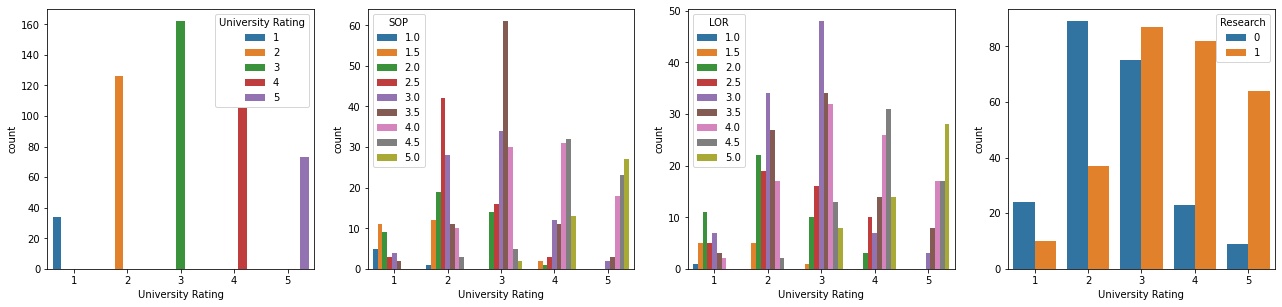

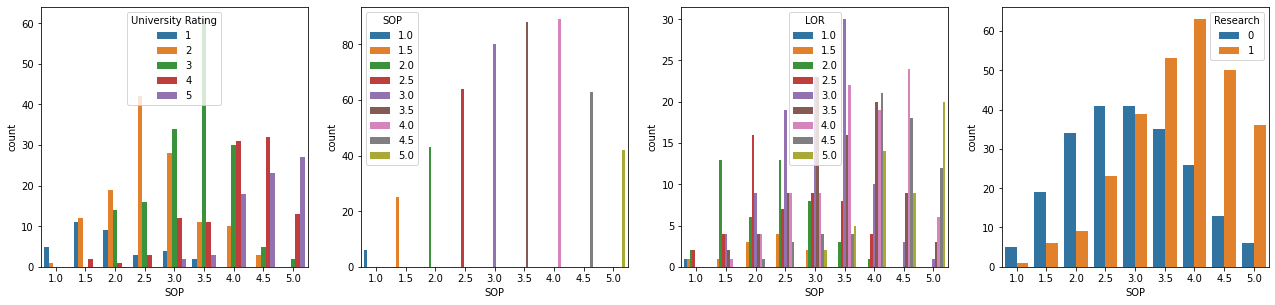

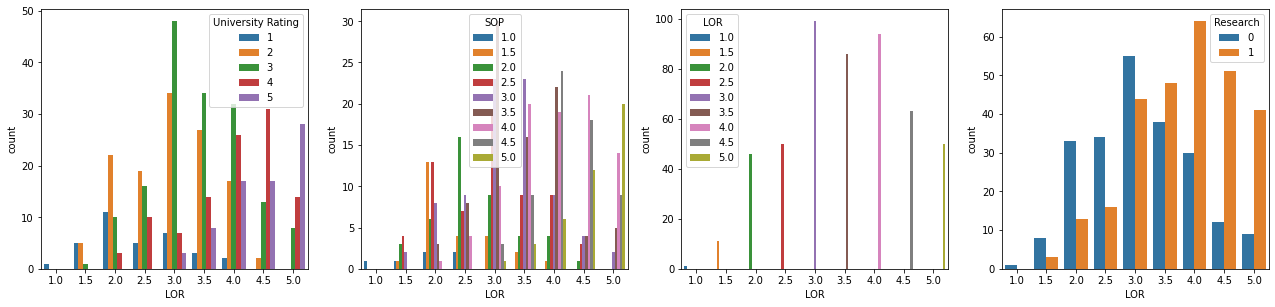

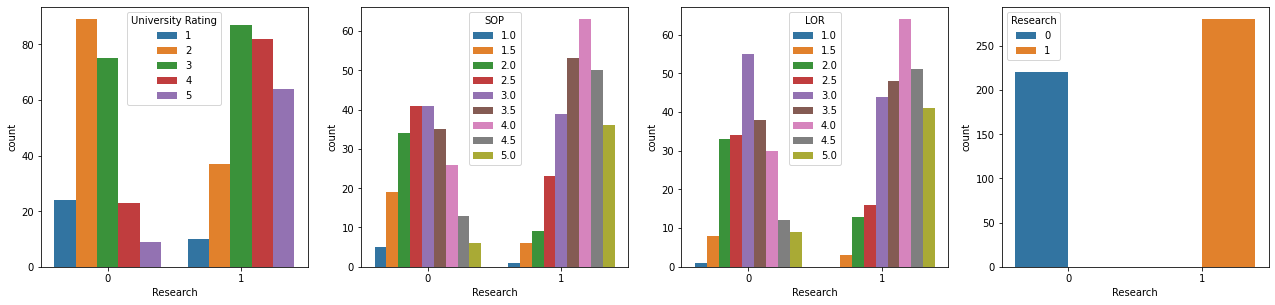

In [41]:
for i in dcol:
    d = 0
    fig = plt.subplots(figsize = (22,22))
    for j in dcol:
        plt.subplot(4,4,d+1)
        sns.countplot(data=df,x = i,hue = j)
        d +=1
    plt.show()

# Multivariate analysis

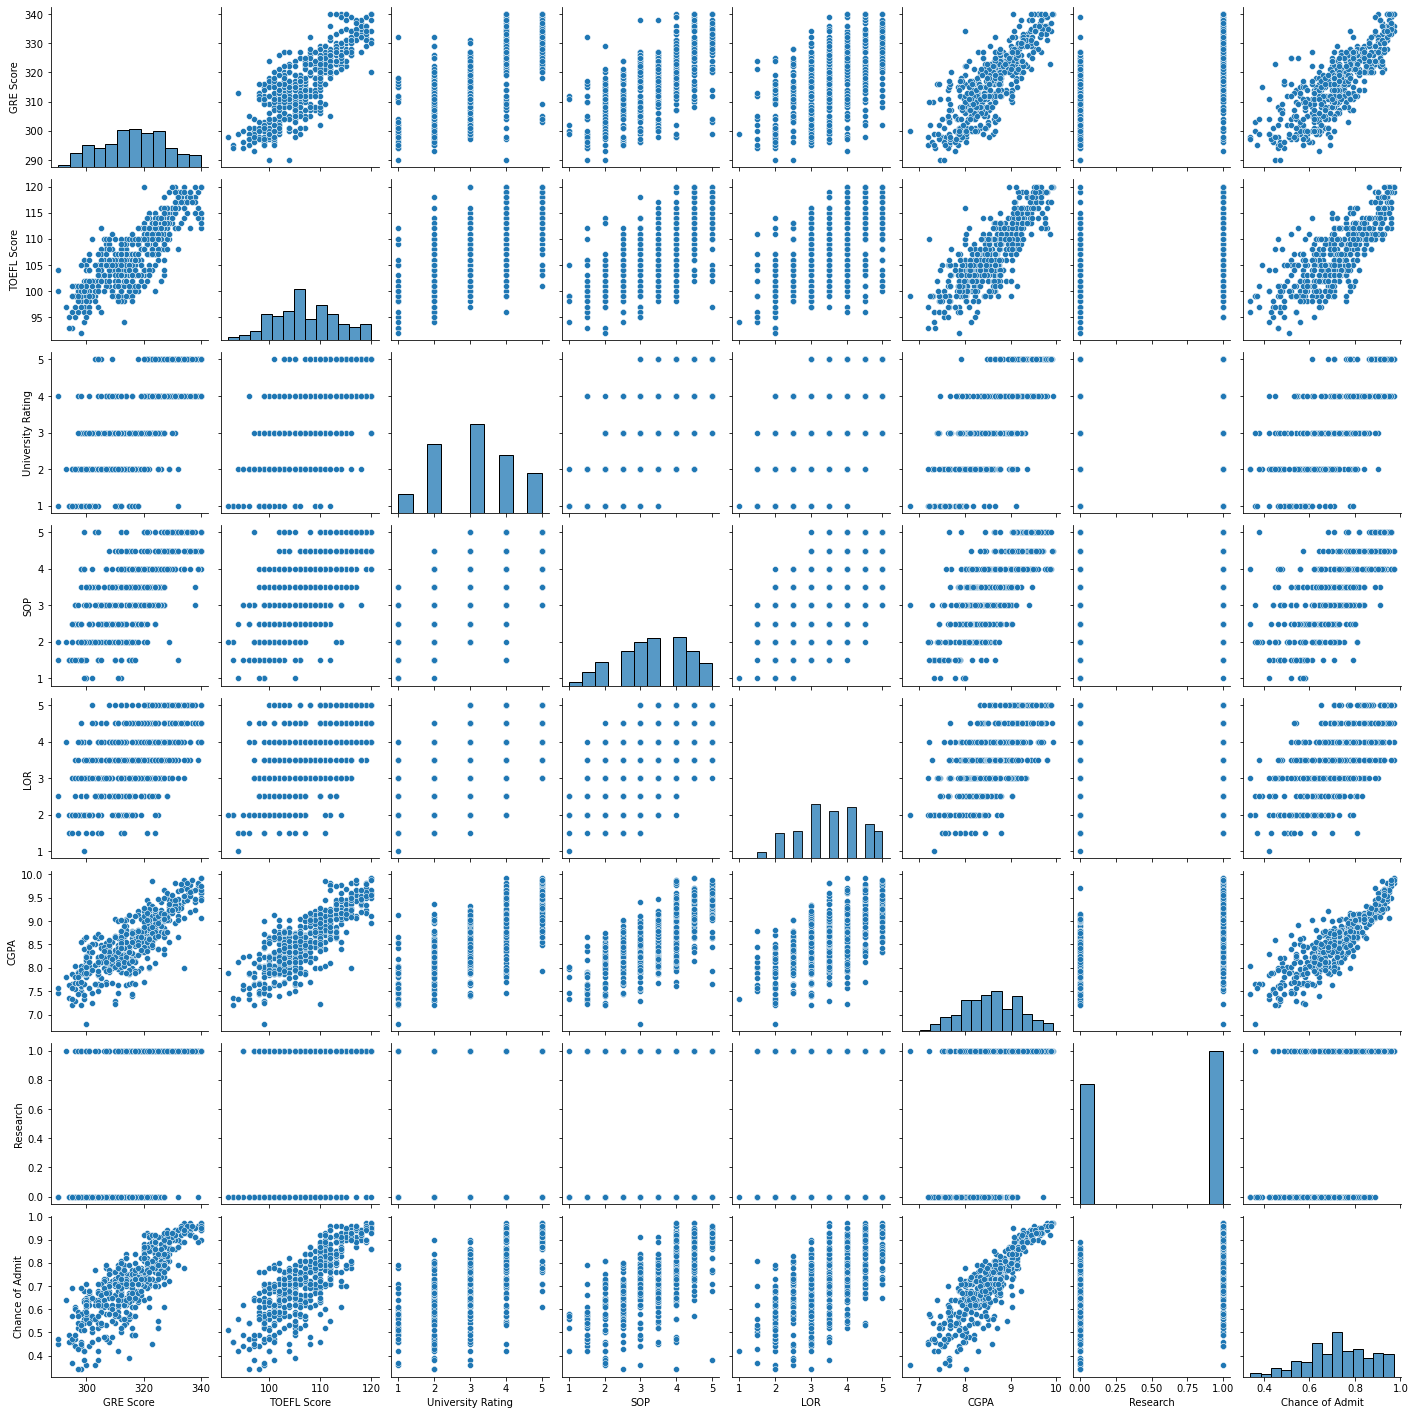

In [42]:
sns.pairplot(data=df)

# Correlation

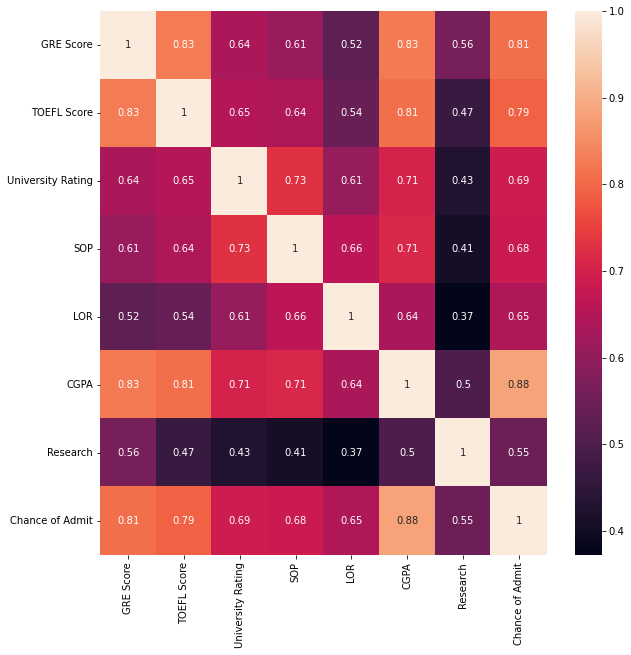

In [43]:
fig = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

Heatmap suggests multi-collinearity between CGPA,TOEFL score and GRE Score

# Data Preprocessing

# Outlier treatment


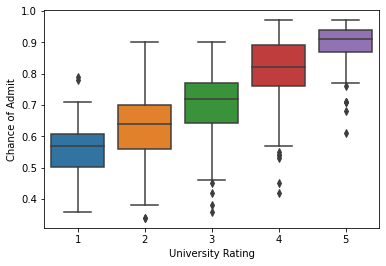

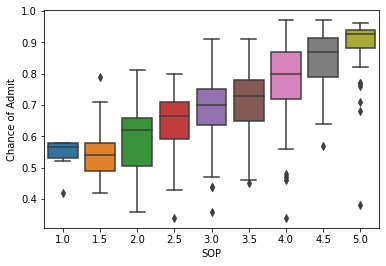

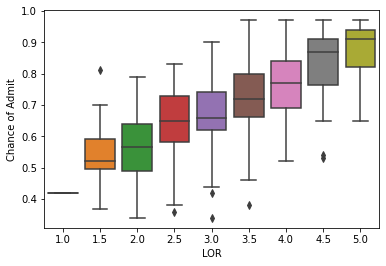

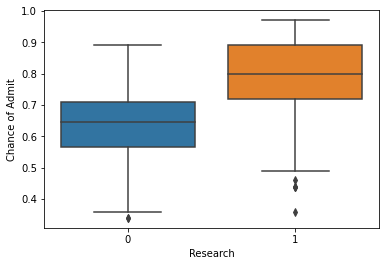

In [44]:
for i in dcol:
    sns.boxplot(data=df,y = "Chance of Admit",x = i)
    plt.show()

In [48]:
#outliers detected on the basis of discrete feature values
index=set()
for i in dcol:
    for j in df[i].unique():
        temp = df[df[i]==j]
        p25 = temp["Chance of Admit"].quantile(0.25)
        p75 = temp["Chance of Admit"].quantile(0.75)
        iqr = p75-p25
        lb = p25-1.5*iqr
        ub = p75+1.5*iqr
        d_index = list(temp[temp["Chance of Admit"]>ub].index)
        index.update(list(d_index))
        d_index = temp[temp["Chance of Admit"]<lb].index
        index.update(list(d_index))
print(index)


{258, 131, 132, 136, 9, 139, 26, 27, 420, 39, 40, 441, 57, 58, 61, 65, 78, 465, 91, 92, 93, 94, 95, 347, 483, 103, 359, 491, 492, 109, 110, 117, 119, 376}


In [49]:
df.drop(index,inplace=True)

# Linear Regression

In [50]:
X = df.iloc[:,:-1]
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [51]:
X.shape

(466, 7)

In [52]:
#Standardize the independent variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)
X_std.set_index(X.index,inplace=True)

In [96]:
X_std.shape


(466, 7)

In [53]:
y = df["Chance of Admit"]
y.shape


(466,)

In [55]:
# Implementing linear regression using statsmodel
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
sX = sm.add_constant(X_std)
X_train,X_test,y_train,y_test = train_test_split(sX,y,test_size=0.2,random_state = 21)
model = sm.OLS(y_train, X_train).fit()

In [56]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     303.8
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          9.07e-148
Time:                        12:52:54   Log-Likelihood:                 594.17
No. Observations:                 372   AIC:                            -1172.
Df Residuals:                     364   BIC:                            -1141.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7366      0.00

In [57]:
y_pred = model.predict(X_test)

In [58]:
summary = pd.DataFrame({"actual":y_test,"predicted":y_pred,"residual":y_test-y_pred})
summary.head()

,actual,predicted,residual
42,0.53,0.686971,-0.156971
183,0.75,0.750943,-0.000943
360,0.85,0.786866,0.063134
267,0.73,0.691336,0.038664
158,0.61,0.618375,-0.008375


# Linear regression using sklearn

In [59]:
import sklearn.linear_model as skl_lm


In [60]:
# Implementing Linear Regression
model = skl_lm.LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [61]:
#creating a dataset containing actual target values of test data and predicted ones
summary = pd.DataFrame({"actual":y_test,"predicted":y_pred,"residual":y_test-y_pred})
summary.head()


,actual,predicted,residual
42,0.53,0.686971,-0.156971
183,0.75,0.750943,-0.000943
360,0.85,0.786866,0.063134
267,0.73,0.691336,0.038664
158,0.61,0.618375,-0.008375


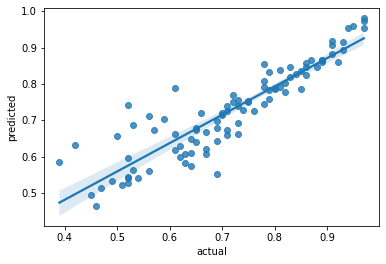

In [62]:
sns.regplot(x = summary.actual,y = summary.predicted)


In [66]:
features = cols[:-1]
features


Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

In [73]:
Intercept=model.intercept_
Intercept


0.7365659165874959

In [74]:
Coefficients=model.coef_
Coefficients

array([0.        , 0.02151911, 0.01508385, 0.01300865, 0.00402429,
       0.01327129, 0.05881019, 0.01076278])

In [75]:
model.score(X_test,y_test)


0.8109928074871684

In [76]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print("mse",mse**0.5)

mse 0.06240029083689119


In [77]:
#Computing mean absolute error using the model
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.040426758648770975

# Check for Heteroskadasticity

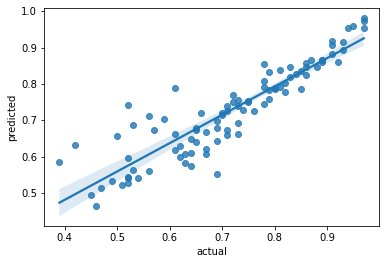

In [84]:
sns.regplot(x = summary.actual,y = summary.predicted)

* Variance of residuals for low values of target variable seems to be more. No clear heteroskadasticity in data can be made out from this plot


# Check for multicollinearity

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
print(vif_data)

             feature          VIF
0          GRE Score  1387.609837
1        TOEFL Score  1269.721507
2  University Rating    24.267727
3                SOP    41.484531
4                LOR    31.119236
5               CGPA   998.154644
6           Research     3.197844
